In [19]:
import csv

with open('outputRunAsyncMongo.csv', newline='') as input_file, \
        open('extracted_data.csv', mode='w', newline='') as output_file:
    writer = csv.writer(output_file, delimiter=',')
    rows = list(csv.reader(input_file, delimiter=','))
    i = 0
    while i < len(rows):
        row = rows[i]
        if row and row[0].startswith('Running test workload'):
            elements = row[0].split()
            size = elements[3]
            test_workload = elements[4][1:]
            runtime = None
            throughput = None
            avg_read_latency = None
            min_read_latency = None
            max_read_latency = None
            avg_insert_latency = None
            min_insert_latency = None
            max_insert_latency = None
            for row2 in rows[i+1:]:
                #print(row2)
                if row2 and row2[0].startswith('[OVERALL]') and row2[1].startswith(' RunTime'):
                    runtime = row2[2]
                elif row2 and row2[0].startswith('[OVERALL]') and row2[1].startswith(' Throughput'):
                    throughput = row2[2]
                elif row2 and row2[0].startswith('[READ]') and row2[1].startswith(' AverageLatency'):
                    avg_read_latency = row2[2]
                elif row2 and row2[0].startswith('[READ]') and row2[1].startswith(' MinLatency'):
                    min_read_latency = row2[2]
                elif row2 and row2[0].startswith('[READ]') and row2[1].startswith(' MaxLatency'):
                    max_read_latency = row2[2]
                elif row2 and row2[0].startswith('[INSERT]') and row2[1].startswith(' AverageLatency'):
                    avg_insert_latency = row2[2]
                elif row2 and row2[0].startswith('[INSERT]') and row2[1].startswith(' MinLatency'):
                    min_insert_latency = row2[2]
                elif row2 and row2[0].startswith('[INSERT]') and row2[1].startswith(' MaxLatency'):
                    max_insert_latency = row2[2]
                elif row2 and row2[0].startswith('Running test workload'):
                    break
            print(size,test_workload, runtime, throughput, avg_read_latency, min_read_latency, max_read_latency, avg_insert_latency, min_insert_latency, max_insert_latency)
            writer.writerow([size,test_workload, runtime, throughput, avg_read_latency, min_read_latency, max_read_latency, avg_insert_latency, min_insert_latency, max_insert_latency])
            i += len(test_workload) + 1
        else:
            i += 1



100 1_0  381  262.4671916010499  2000.4  277  153087 None None None
100 50_50  642  155.76323987538942  7713.722222222223  482  167679  659.5652173913044  101  3337
100 10_90  512  195.3125  5365.615384615385  538  18511  2528.1264367816093  69  193023
500 1_0  558  896.0573476702509  716.78  211  181631 None None None
500 50_50  1228  407.1661237785016  3752.285123966942  211  181119  417.74418604651163  35  6987
500 10_90  844  592.4170616113744  6475.448979591837  264  62847  802.2549889135255  30  217343
1000 1_0  612  1633.986928104575  426.322  190  164095 None None None
1000 50_50  772  1295.3367875647668  694.5236363636363  185  198143  440.29333333333335  49  6351
1000 10_90  1644  608.272506082725  10756.255102040815  267  135935  395.340354767184  13  187903
100 1_0  478  209.20502092050208  2843.65  346  222975 None None None
100 50_50  467  214.13276231263384  4730.306122448979  295  199423  496.98039215686276  103  2433
100 10_90  440  227.27272727272728  1532.14285714285

In [24]:
import pandas as pd

df = pd.read_csv('extracted_data.csv', header=None)
df.columns = ['size', 'test_workload', 'runtime', 'throughput', 'avg_read_latency', 'min_read_latency', 'max_read_latency', 'avg_insert_latency', 'min_insert_latency', 'max_insert_latency']

df.replace('1_0', '100/0', inplace=True)
df.replace('50_50', '50/50', inplace=True)
df.replace('10_90', '10/90', inplace=True)

print(len(df))

print(df)

90
    size test_workload  runtime   throughput  avg_read_latency  \
0    100         100/0      381   262.467192       2000.400000   
1    100         50/50      642   155.763240       7713.722222   
2    100         10/90      512   195.312500       5365.615385   
3    500         100/0      558   896.057348        716.780000   
4    500         50/50     1228   407.166124       3752.285124   
..   ...           ...      ...          ...               ...   
85   500         50/50      587   851.788756        741.047619   
86   500         10/90      577   866.551127        766.377358   
87  1000         100/0      768  1302.083333        598.977000   
88  1000         50/50      620  1612.903226        545.951983   
89  1000         10/90      801  1248.439451       2489.421053   

    min_read_latency  max_read_latency  avg_insert_latency  \
0                277            153087                 NaN   
1                482            167679          659.565217   
2                5

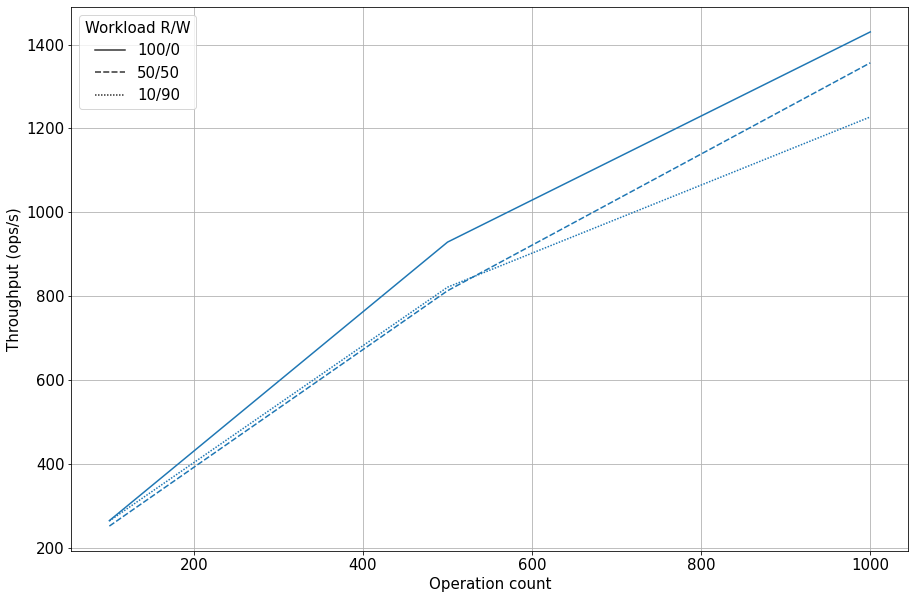

In [21]:
import seaborn as sns
# set name of axis
import matplotlib.pyplot as plt
from matplotlib import rcParams

font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 15}

plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot( ax = ax,x='size', y='throughput', style='test_workload', data=df, ci=None)
ax.set(xlabel="Operation count", ylabel='Throughput (ops/s)')
plt.legend(title='Workload R/W', loc='upper left')
plt.grid()  #just add this
plt.show()

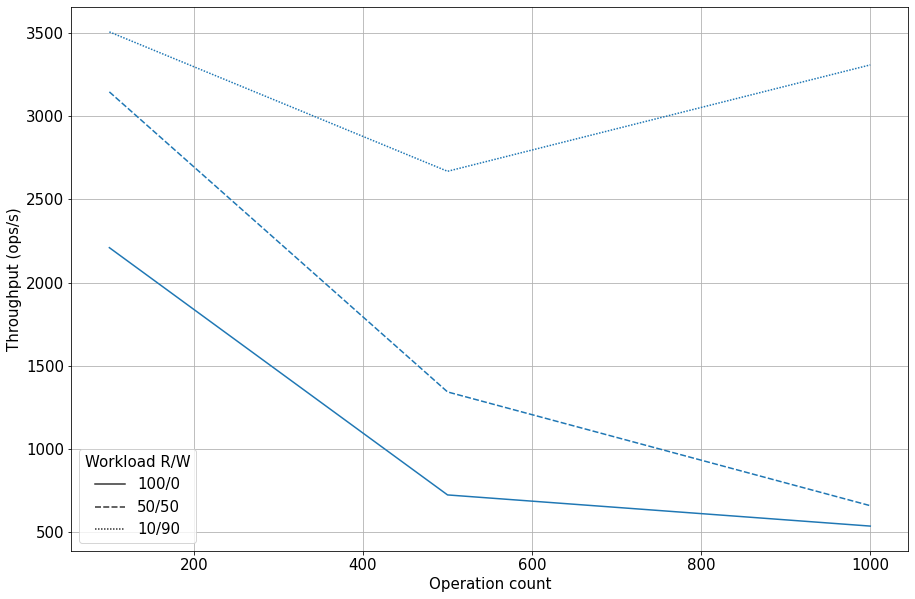

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot( ax = ax,x='size', y='avg_read_latency', style='test_workload', data=df, ci=None)
ax.set(xlabel="Operation count", ylabel='Throughput (ops/s)')
plt.legend(title='Workload R/W')
plt.grid()  #just add this
plt.show()

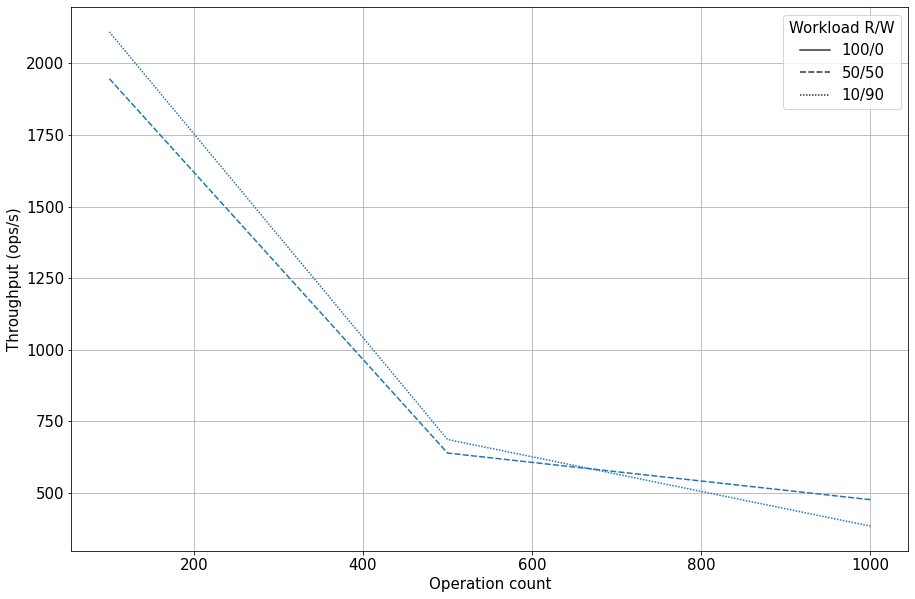

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot( ax = ax,x='size', y='avg_insert_latency', style='test_workload', data=df, ci=None)
ax.set(xlabel="Operation count", ylabel='Throughput (ops/s)')
plt.legend(title='Workload R/W')
plt.grid()  #just add this
plt.show()

In [60]:
with (open("OutputIORun.csv", "r") as csv_file,
      open("OutputIORun2.csv", "w") as new_file):
    for line in csv_file:
        new_file.write(line.replace('   ', ','))
with open('OutputIORun2.csv', newline='') as input_file, \
        open('extracted_dataIO.csv', mode='w', newline='') as output_file:
    writer = csv.writer(output_file, delimiter=',')
    rows = list(csv.reader(input_file, delimiter=','))
    i = 0
    while i < len(rows):
        row = rows[i]
        if row and row[0].startswith('Running test workload'):
            elements = row[0].split()
            size = elements[3]
            test_workload = elements[4][1:]
            for j in range(2,6):
                n_rows = []
                node = rows[i+j][1]
                for k in range(len(rows[i+j])):
                    if rows[i+j][k]!='':
                        n_rows.append(rows[i+j][k])
                #print(n_rows)
                cpu = n_rows[2][:-1]
                memory_usage = n_rows[3].split(" /")[0][2:-3]
                memory_percent = n_rows[4][:-1]
                net_input = n_rows[5].split(" /")[0][2:]
                net_output = n_rows[5].split(" /")[1][1:]
                net_input = float(net_input[:-2]) if net_input[-2:] == "kB" else float(net_input[:-2])*1024
                net_output = float(net_output[:-2]) if net_output[-2:] == "kB" else float(net_output[:-2])*1024

                writer.writerow([size,test_workload, node, cpu, memory_usage, memory_percent, net_input, net_output])

            i += 6
        else:
            i += 1

In [73]:
df = pd.read_csv('extracted_dataIO.csv', header=None)
df.columns = ['size', 'Workload R/W', 'node', 'cpu', 'memory_usage', 'memory_percent', 'net_input', 'net_output']

df.replace('1_0', '100/0', inplace=True)
df.replace('50_50', '50/50', inplace=True)
df.replace('10_90', '10/90', inplace=True)

print(len(df))

print(df)

360
     size Workload R/W        node   cpu  memory_usage  memory_percent  \
0     100        100/0  secondary1  0.66         77.61            0.98   
1     100        100/0  secondary2  0.66         77.70            0.98   
2     100        100/0     primary  0.67         79.60            1.01   
3     100        100/0  secondary3  0.68         77.74            0.98   
4     100        50/50  secondary1  0.58         77.54            0.98   
..    ...          ...         ...   ...           ...             ...   
355  1000        50/50     primary  0.61        127.30            1.61   
356  1000        10/90  secondary1  0.54         94.57            1.19   
357  1000        10/90  secondary2  0.56         85.41            1.08   
358  1000        10/90  secondary3  0.57         85.02            1.07   
359  1000        10/90     primary  0.73        127.40            1.61   

     net_input  net_output  
0      1873.92      553.00  
1      1832.96      551.00  
2      2385.92     5

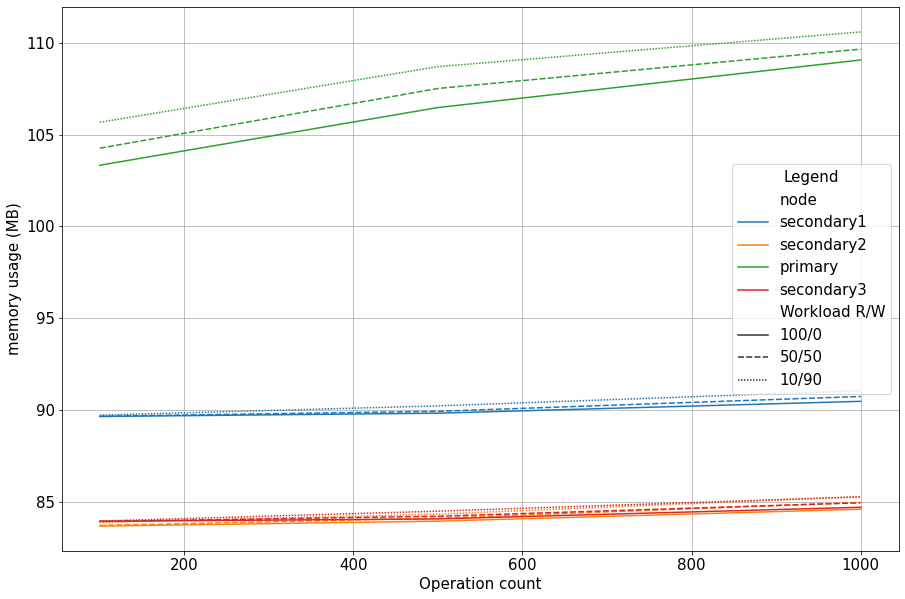

In [74]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot( ax = ax,x='size', y='memory_usage', hue="node",style='Workload R/W', data=df, ci=None)
ax.set(xlabel="Operation count", ylabel='memory usage (MB)')
plt.legend(title='Legend', loc='right')
plt.grid()  #just add this
plt.show()

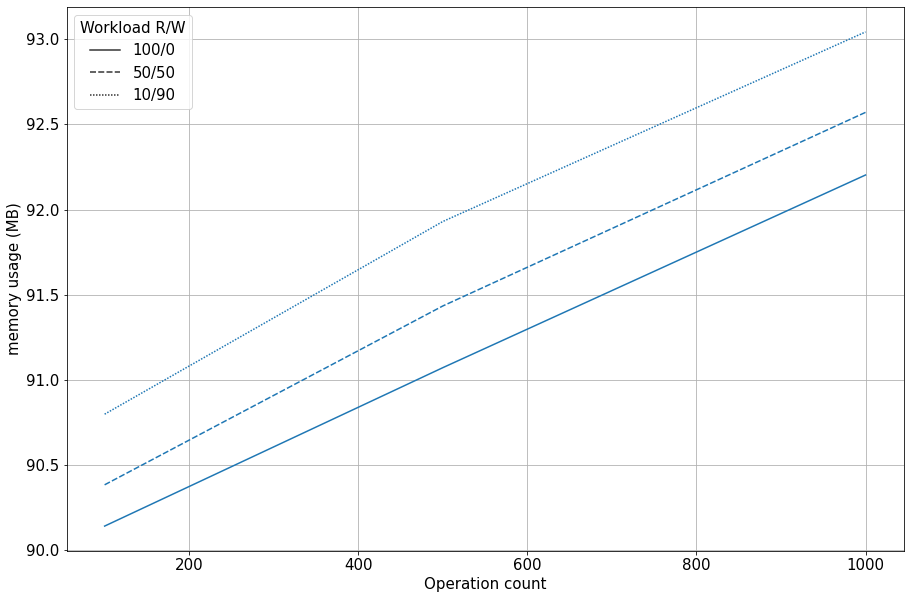

In [75]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot( ax = ax,x='size', y='memory_usage', style='Workload R/W', data=df, ci=None)
ax.set(xlabel="Operation count", ylabel='memory usage (MB)')
plt.legend(title='Workload R/W', loc='upper left')
plt.grid()  #just add this
plt.show()

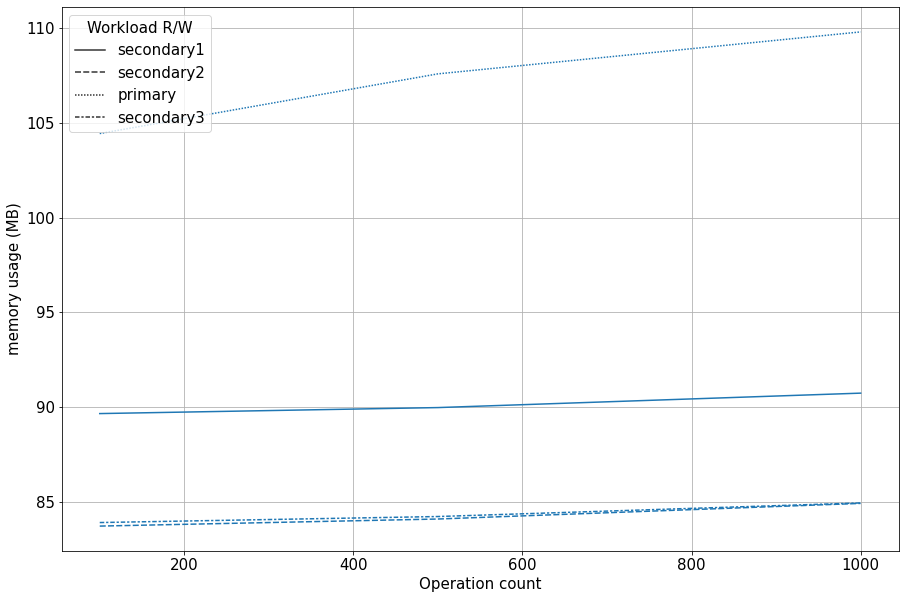

In [67]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot( ax = ax,x='size', y='memory_usage', style='node', data=df, ci=None)
ax.set(xlabel="Operation count", ylabel='memory usage (MB)')
plt.legend(title='Workload R/W', loc='upper left')
plt.grid()  #just add this
plt.show()

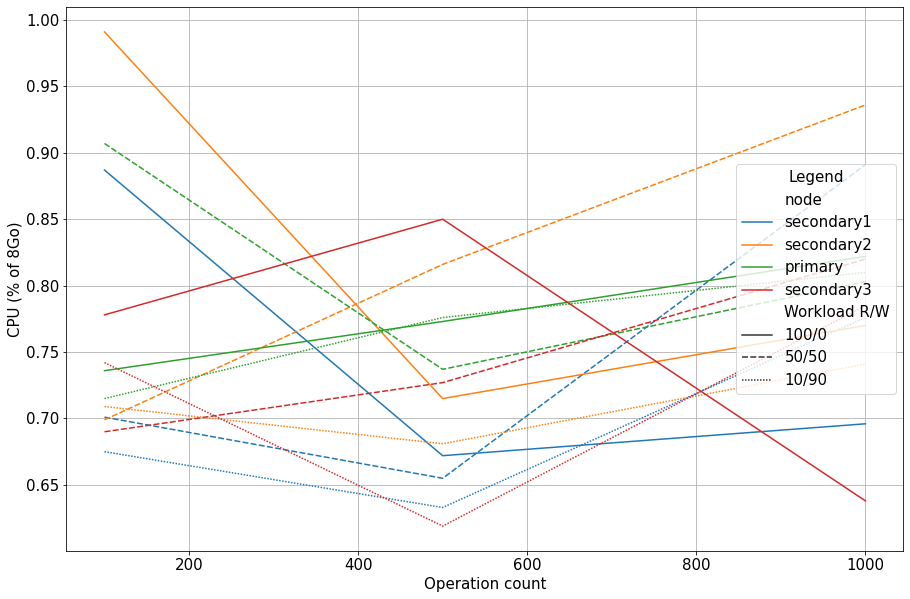

In [77]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot( ax = ax,x='size', y='cpu', hue="node",style='Workload R/W', data=df, ci=None)
ax.set(xlabel="Operation count", ylabel='CPU (% of 8Go)')
plt.legend(title='Legend', loc='right')
plt.grid()  #just add this
plt.show()

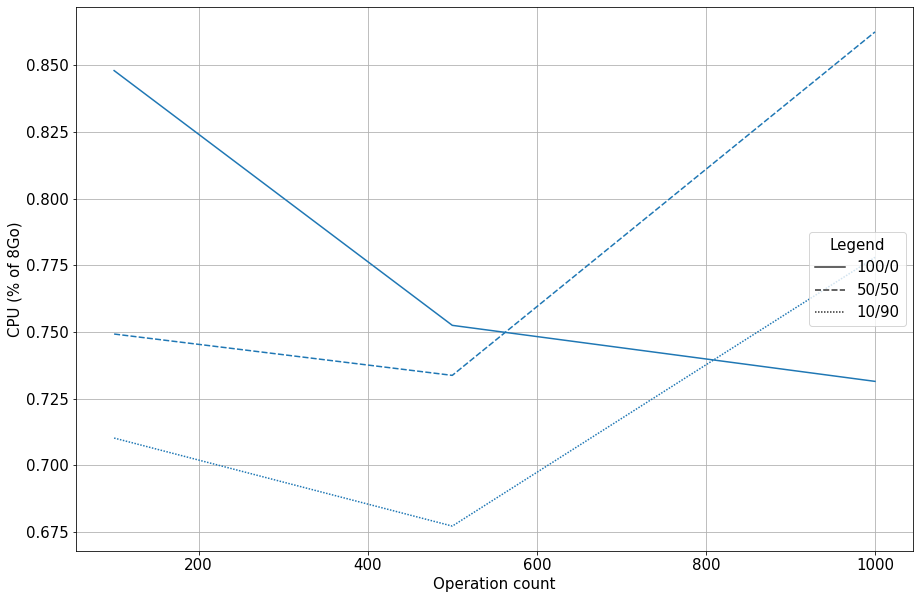

In [78]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot( ax = ax,x='size', y='cpu',style='Workload R/W', data=df, ci=None)
ax.set(xlabel="Operation count", ylabel='CPU (% of 8Go)')
plt.legend(title='Legend', loc='right')
plt.grid()  #just add this
plt.show()

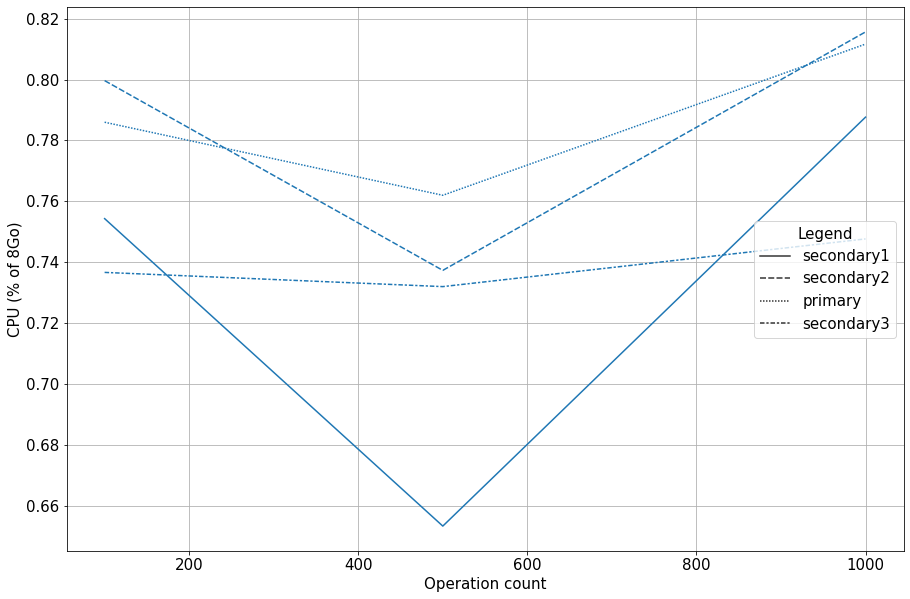

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot( ax = ax,x='size', y='cpu', style='node', data=df, ci=None)
ax.set(xlabel="Operation count", ylabel='CPU (% of 8Go)')
plt.legend(title='Legend', loc='right')
plt.grid()  #just add this
plt.show()